In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
music = pd.read_csv("cleaned_music.csv")
music

,Unnamed: 0,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,1,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,2,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,3,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,4,Jordan Comolli,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,40555,Night Lovell,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.99,0.629,Hip-Hop
40556,40556,Roy Woods,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04,0.113,Hip-Hop
40557,40557,Berner,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.08,0.395,Hip-Hop
40558,40558,The-Dream,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.89,0.354,Hip-Hop


In [3]:
music = music.drop(["Unnamed: 0"], axis = 1)

From the table, unknown column "Unnamed: 0" spotted. Hence, removed.

# 3) Exploratory Analysis

Looking at the top 20 artists with the most number of songs

In [4]:
artists = music["artist_name"].value_counts()[:20].sort_values(ascending = True)

In [5]:
artists

Logic                         74
Ryuichi Sakamoto              75
Mac Miller                    75
Wiz Khalifa                   76
Kevin Gates                   78
Howard Shore                  79
Pyotr Ilyich Tchaikovsky      81
The Black Keys                95
Future                        99
Thievery Corporation         107
Eminem                       125
Capcom Sound Team            132
Yuki Hayashi                 133
Drake                        141
Frédéric Chopin              195
Ludwig van Beethoven         256
Johann Sebastian Bach        268
Wolfgang Amadeus Mozart      327
Nobuo Uematsu                347
empty_field                 2004
Name: artist_name, dtype: int64

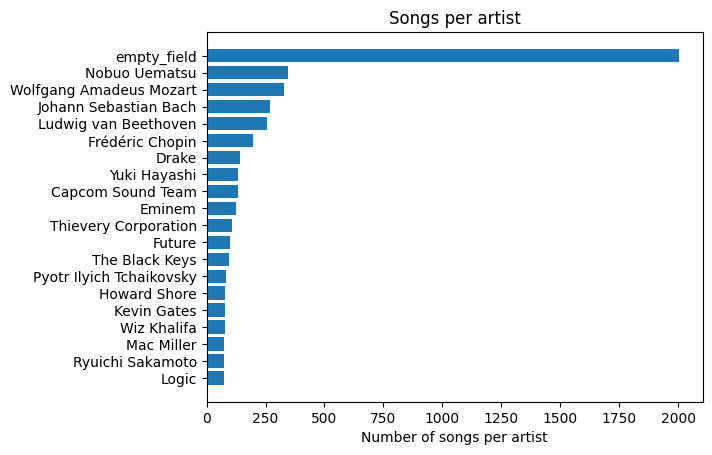

In [6]:
plt.barh(artists.index, artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

It seems the dataset was compiled by Japanese authors or in Japan since several artists in top20 are from the Land of the Rising Sun. Furthermore, many composers (e.g., Mozart, Beethoven, etc.) also found their place in this list. Now, to avoid large number of features, the artist_name is removed.

In [7]:
music.drop("artist_name", axis = 1, inplace = True)

A brief check shows that most of the features hold numerical values save three columns which has categorical data. All feature are explored further in the next chapter.

In [8]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic


Visualizing Data

In this segment, we will look at the distribution of each audio variables. How spread is the data in terms of valence, danceability and many more. We want to check how majority of the songs behaves. Seeing the behaviour of the songs can help us in understanding how each songs works. Below is the plot for mainly for 

In [9]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = music, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

The plot below shows how many times each key present in the dataset. The most frequent one is "C" and the least frequent one is "D#"

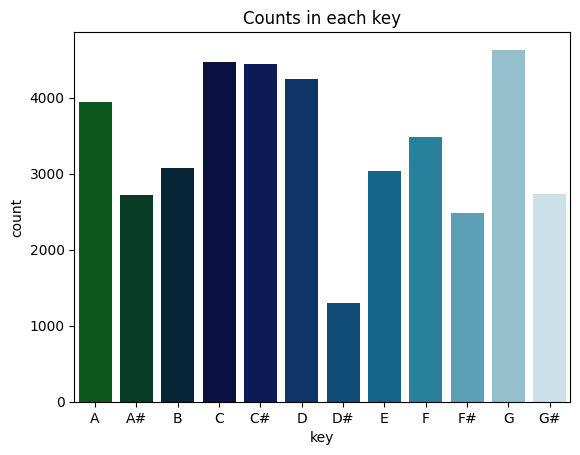

In [10]:
plot_counts("key", ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"])

The plot below shows the mode in all songs of the dataset.

Majority of the songs are in "major" mode.

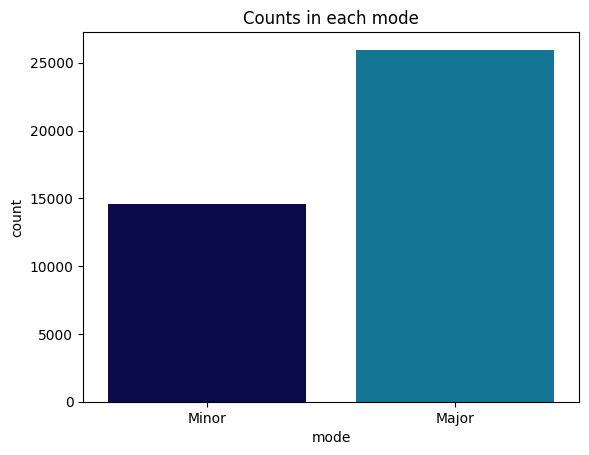

In [11]:
plot_counts("mode")

The plot below shows the genre of songs

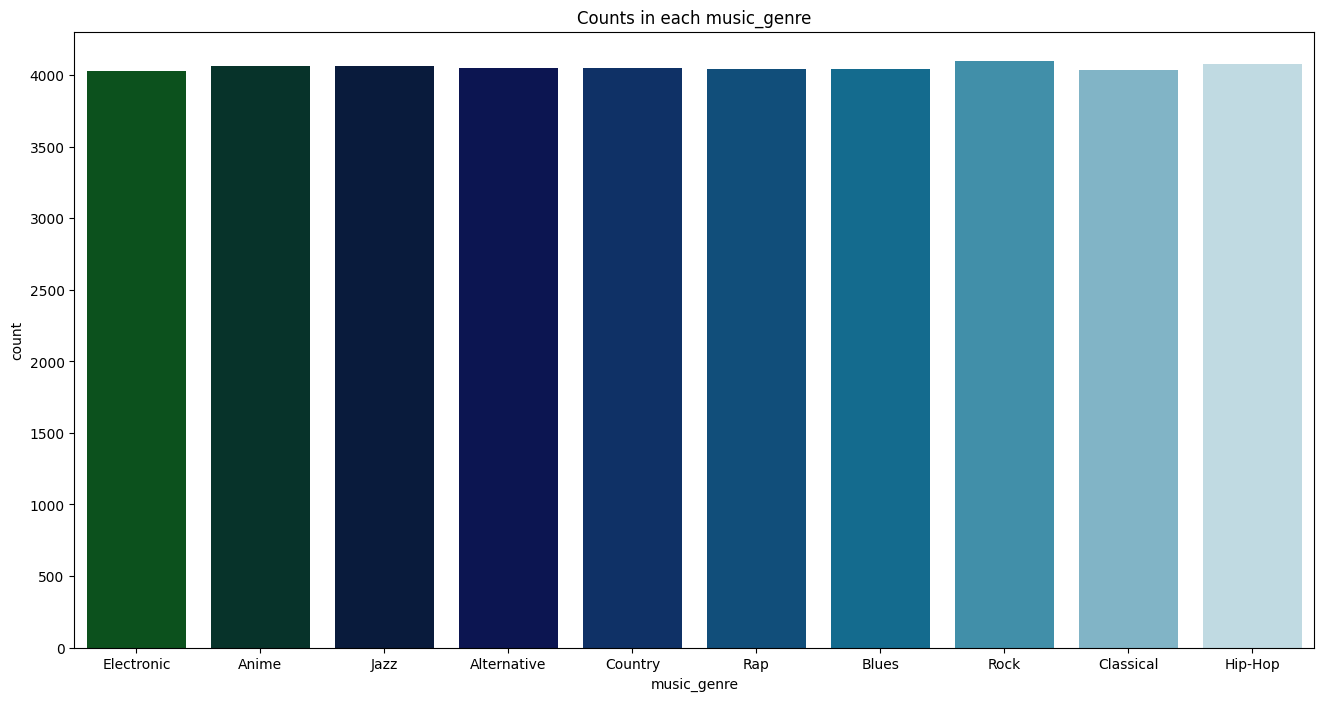

In [12]:
plt.figure(figsize = (16, 8))
plot_counts("music_genre")

We then move on to looking at the continous variables.
Distribution of continuous values in numeric features is displayed on subplots to spare time and space.

Displaying distributions is possible only for features holding numeric values. For this reason, they are stored in a separate variable.

In [13]:
numeric_features = music.drop(["key", "music_genre", "mode"], axis = 1)

The code lines below display the distributions of all numeric features on subplots. They are interpreted thereafter.

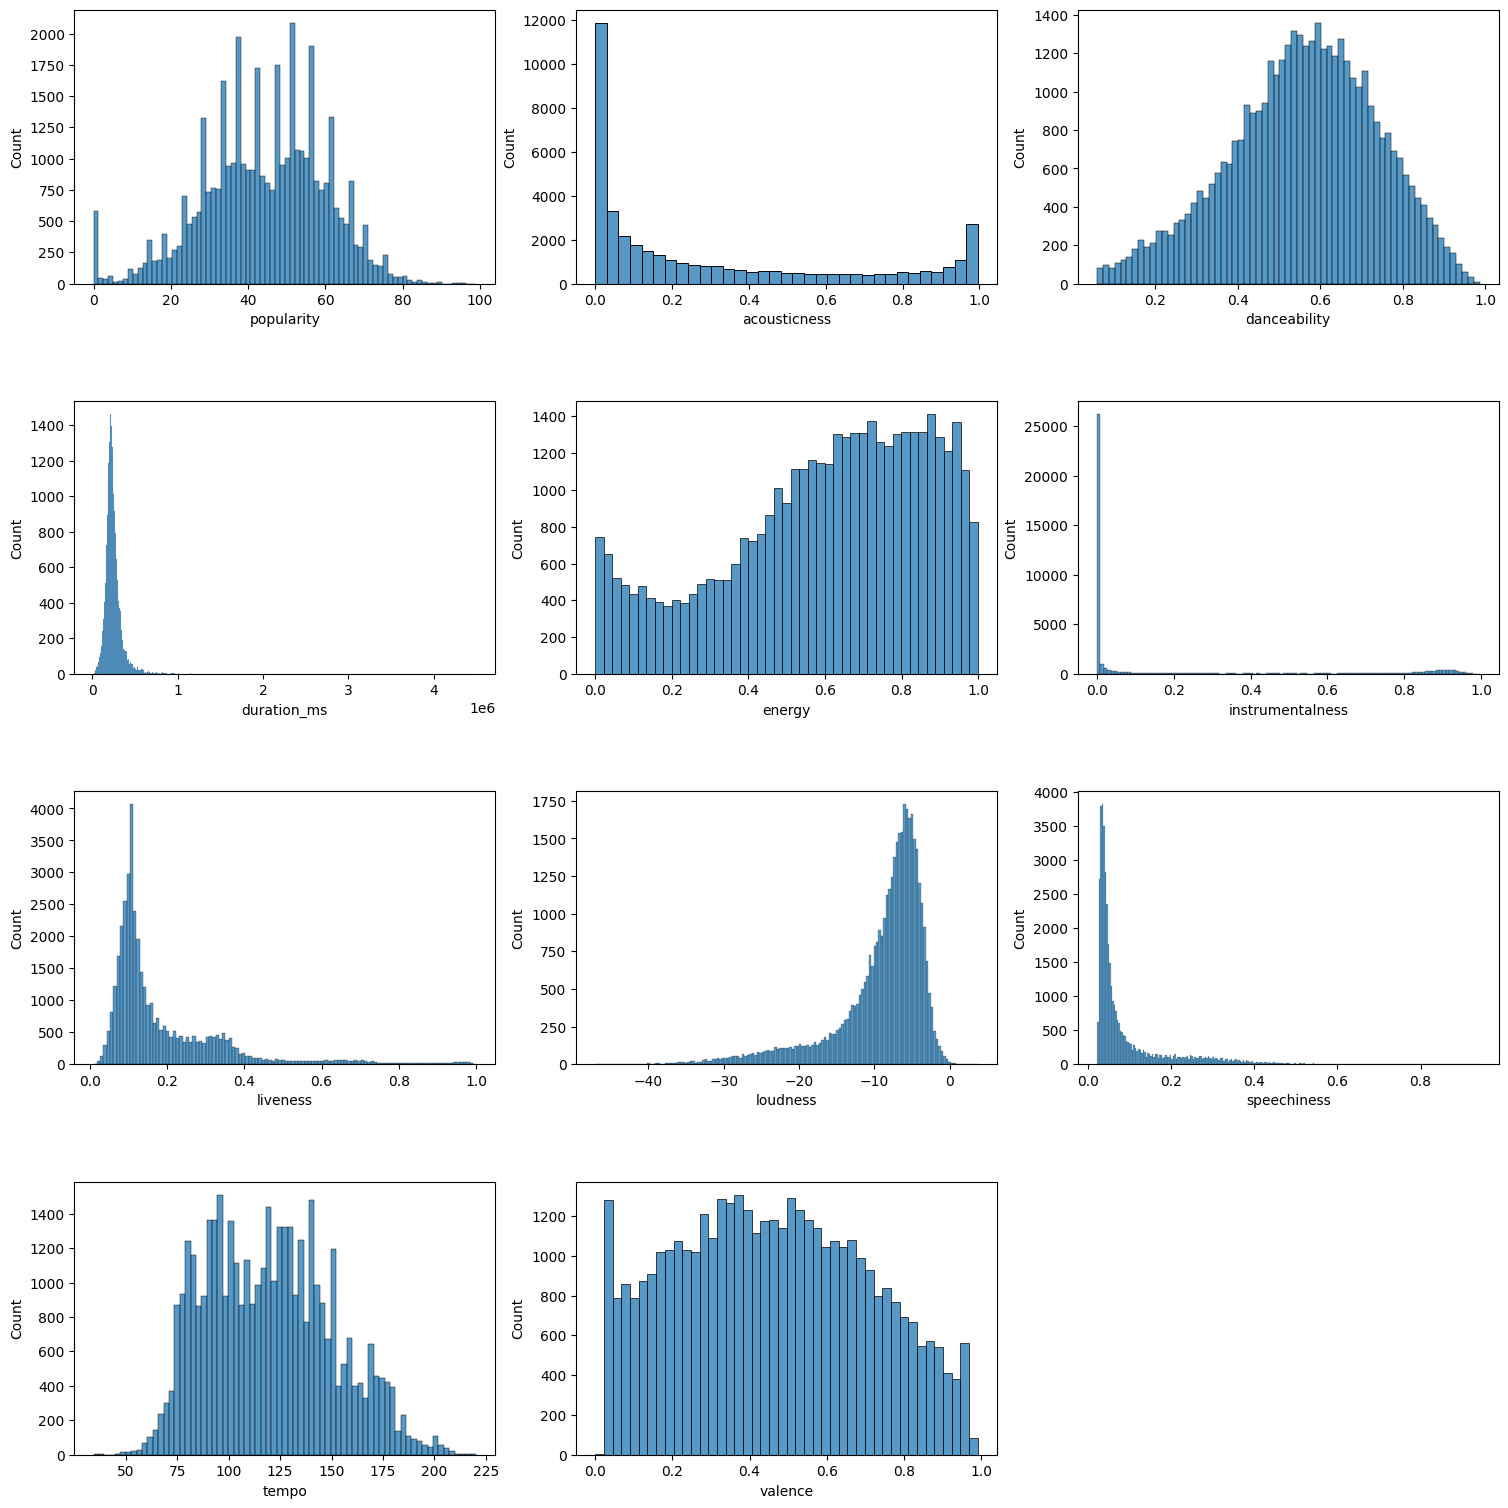

In [14]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in numeric_features.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Popularity: Defines how popular the songs are ranging from 0 to 100. The data seems to be normally distributed. However at certain popularity level, there exists a large number of songs in that popularity level. Which seems very odd. However, it is good to see the data normally distributed to see distinct difference between the songs.

Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. From the histogram, most of the songs has an acousticness of 0.0 whereas the rest of songs seem to be evenly spread across 0.0 to 1.0.

Danceability: How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. In the histogram, the model has a normal distribution. Majority of songs have the danceability of between 0.4 to 0.8. 

Duration_ms: The duration of the track in milliseconds. All the songs lies below 0.5x10^6 MS marking. 

Energy: It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. The energy of the songs are quite widely spread across 0 to 1. Each song seems to have a different range of energy. Which may be useful in our prediction.

Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Almost 90% of the songs do not contains vocals. While there's about 5% of the songs do contains high instrumentalness of 0.9. 


Liveness: Higher liveness values represent an increased probability that the track was performed live. From the histogram, The chances of songs recording live is not very high. With majority of the songs lies below 0.4 Liveness. 

Loudness: The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db. In our dataset, majority of our songs have loudness of between -10 to 0. Relatively quiet. 

Speechiness: It detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Between 0.33 and 0.66 describe tracks that may contain both music and speech. Values below 0.33 most likely represent music and other non-speech-like tracks. In our dataset, Almost all the songs do not contains any spoken words in the track. With only a small part with 0.3 to 0.4 contain both music and speech.

Tempo measures the beats per minute (bpm) of a song. It is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of the song tempo are quite widely spread. Every song does contains a different level of tempo. Which could be 1 of the characteristic for our prediction.


Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High valence sound more positive (e.g. happy, cheerful, euphoric), while low valence sound more negative (e.g. sad, depressed, angry). The valence of the songs are quite evenly spread out. Each track in the dataset contains different valence. No outliers seen in the histogram. 

The code lines below help for displaying numeric features on boxplots. The latter are very useful for identifying outliers, i.e., extreme or wrong values in a feature. Outliers could distort model training and inference. For this reason, it is a good practice (whenever possible and justifiable) to remove them. A brief overview of outliers is given below the plots.

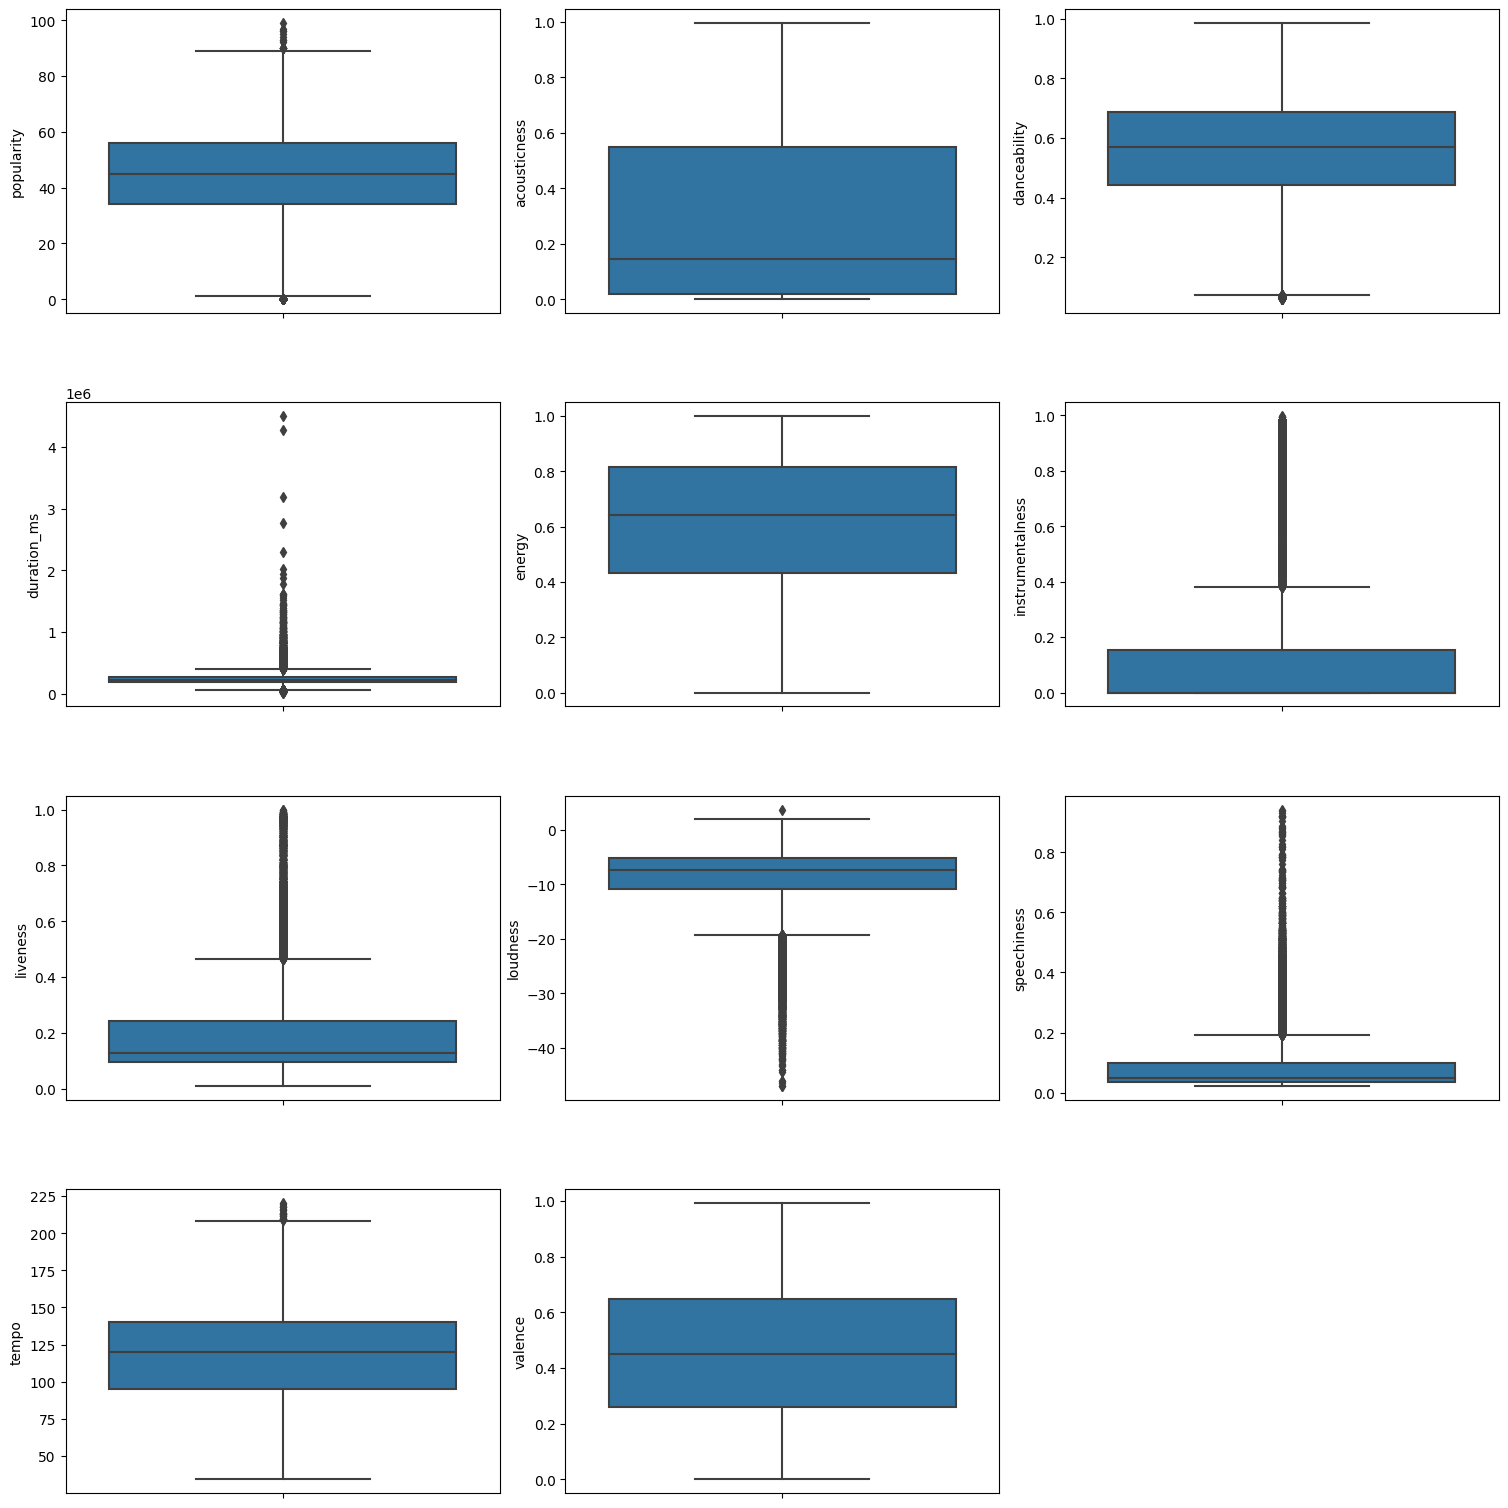

In [15]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxplot(y = k, data = numeric_features, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

A small number of outliers are seen in popularity, danceability, and tempo. On the other hand, many extreme values are found in duration, instrumentlness, liveness, loudness, and speechiness. Since the overall objective of this exercise is not devising the best model but to interpret classification outputs, outliers are not removed.

Now, we will look at the correlation between song genre and every variable. 

Below are the boxplots showing the correlation between song genres and acousticness

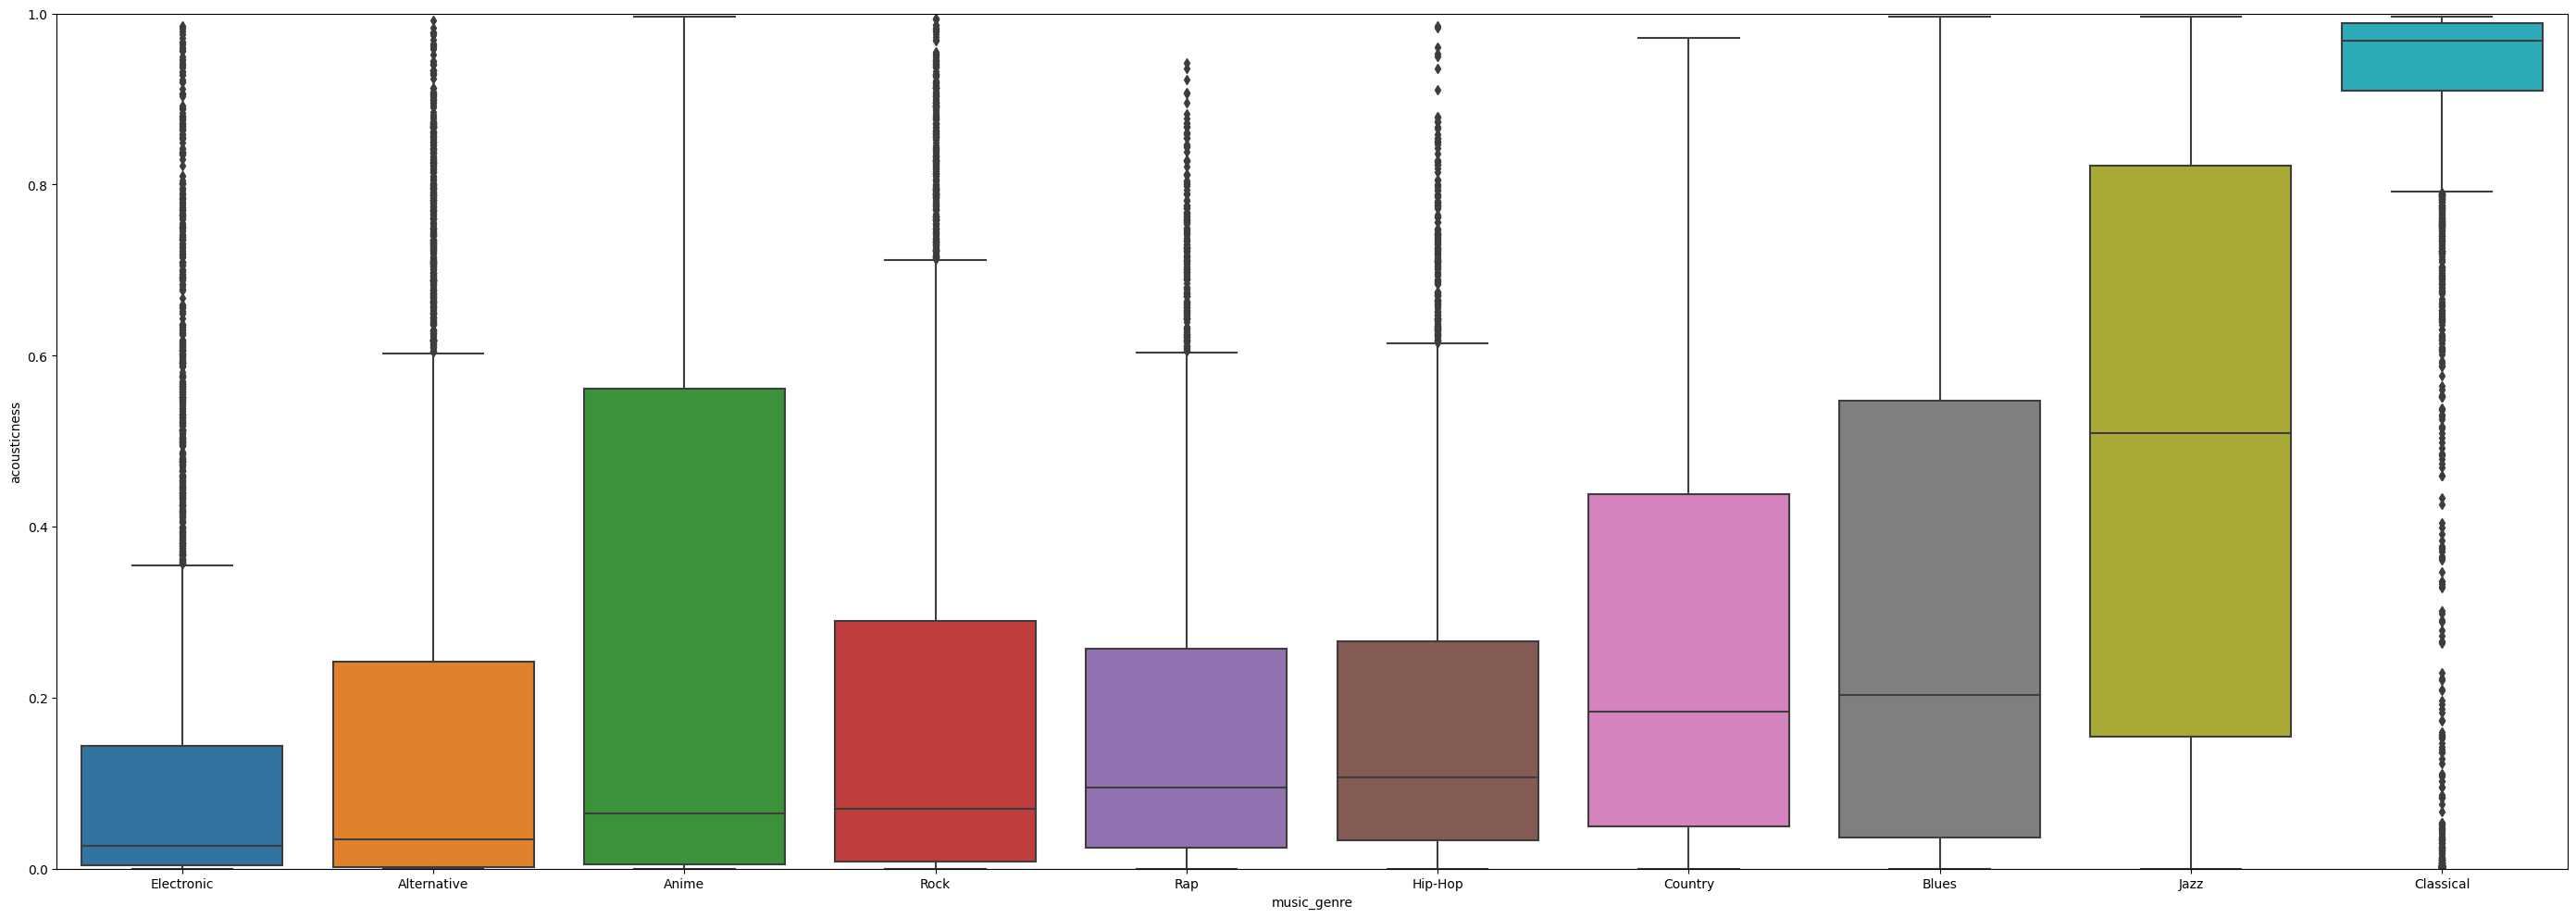

In [16]:
group_means=music.groupby(['music_genre'])['acousticness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,1.0)
sns.boxplot(x='music_genre', y='acousticness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and energy

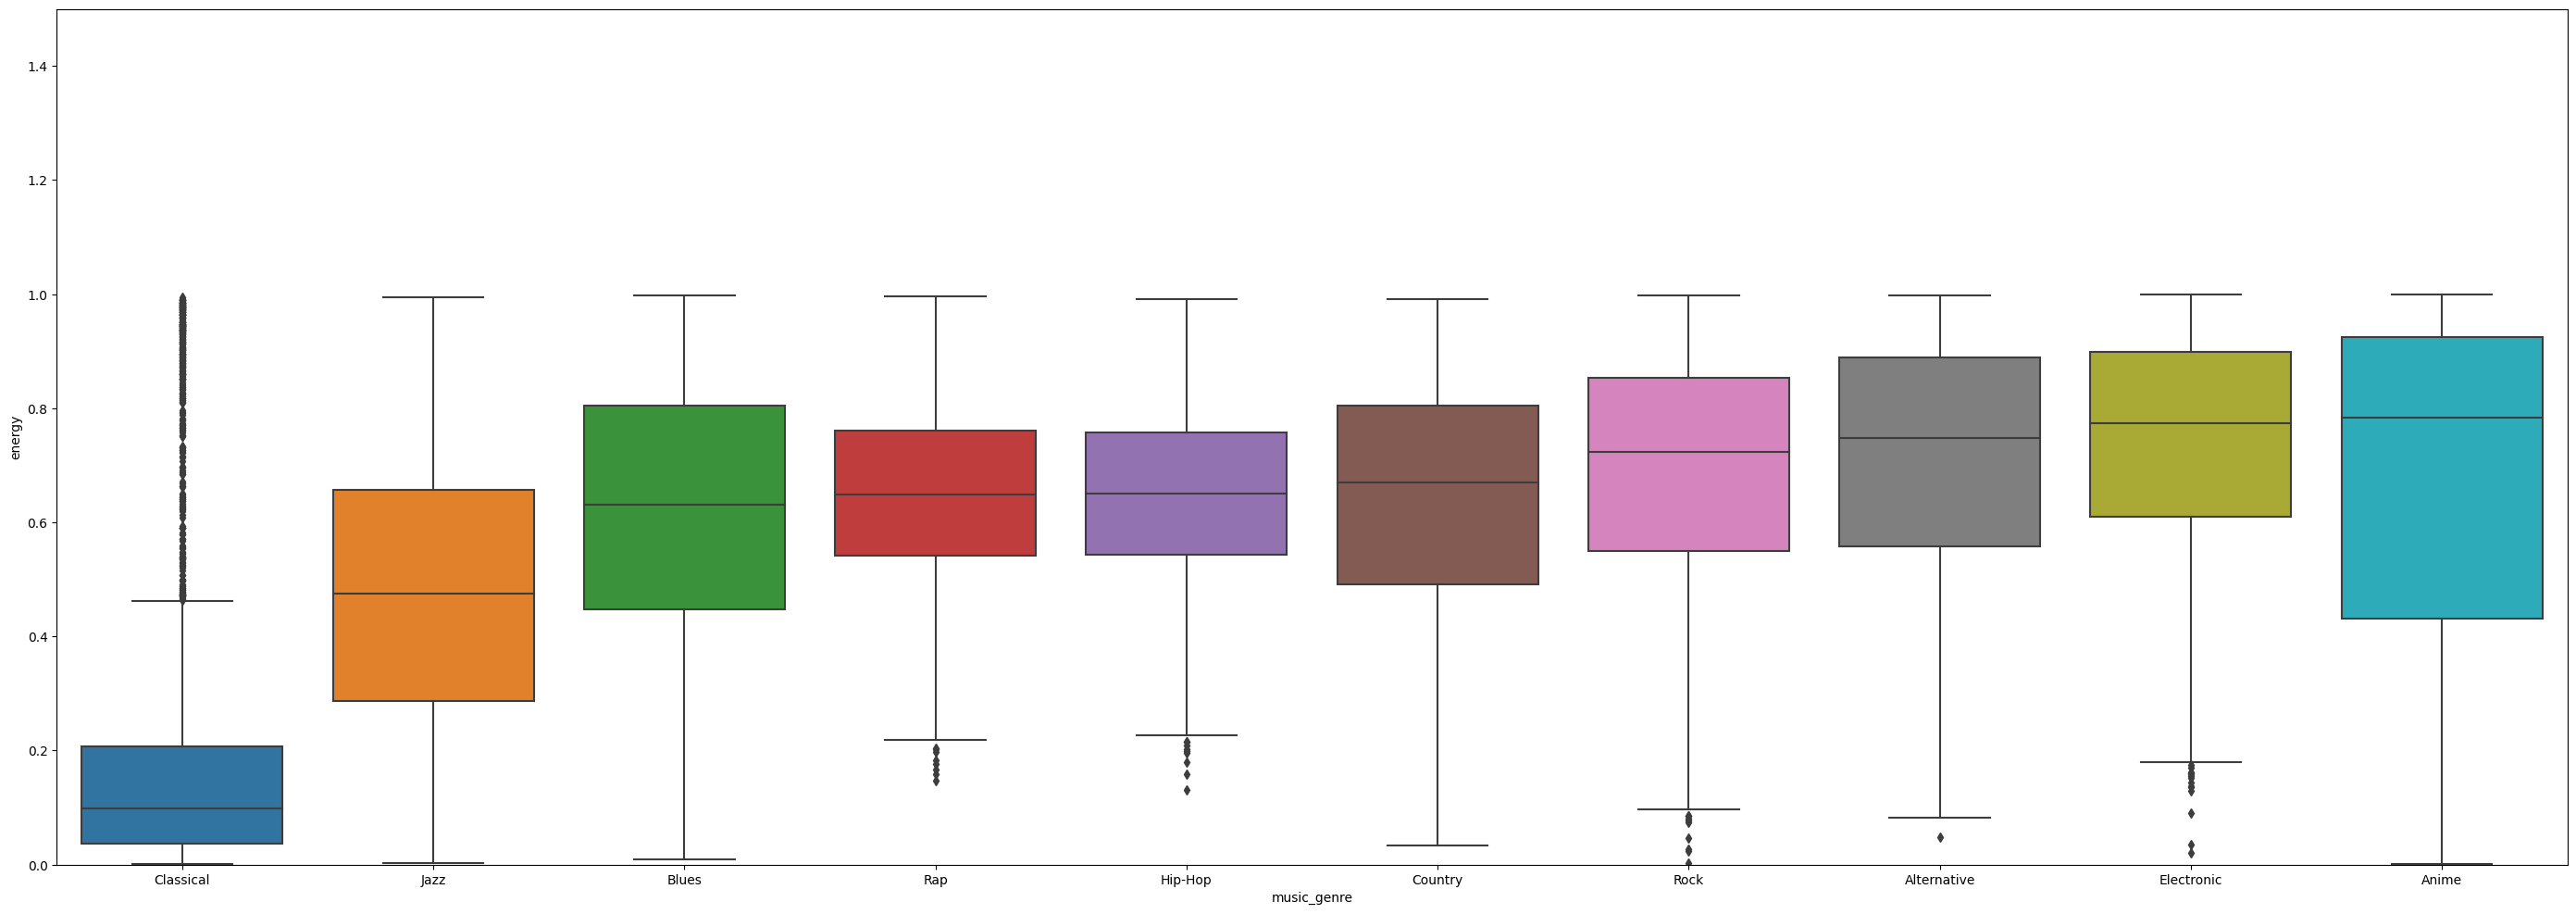

In [17]:
group_means=music.groupby(['music_genre'])['energy'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='energy', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and popularity

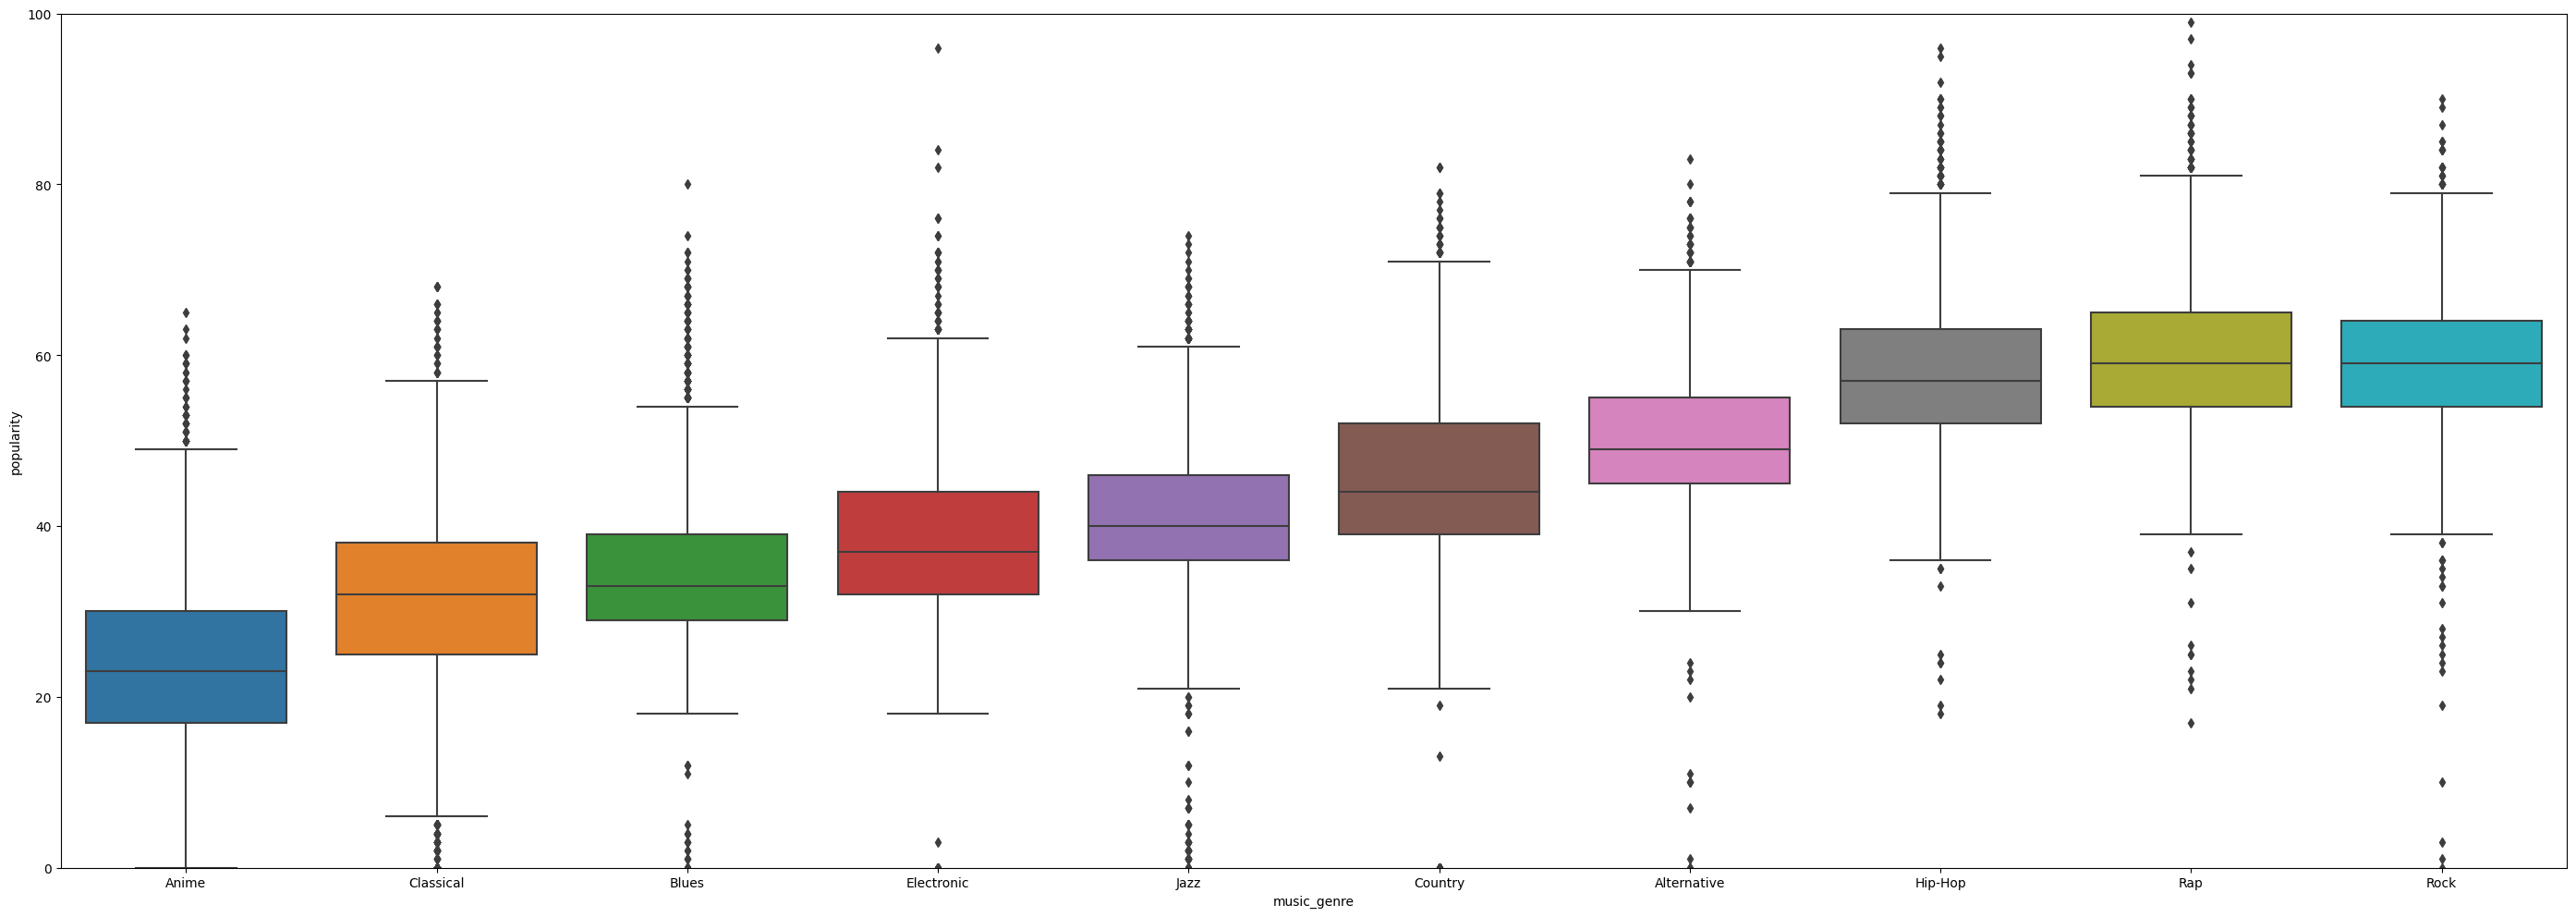

In [18]:
group_means=music.groupby(['music_genre'])['popularity'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,100)
sns.boxplot(x='music_genre', y='popularity', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and danceability

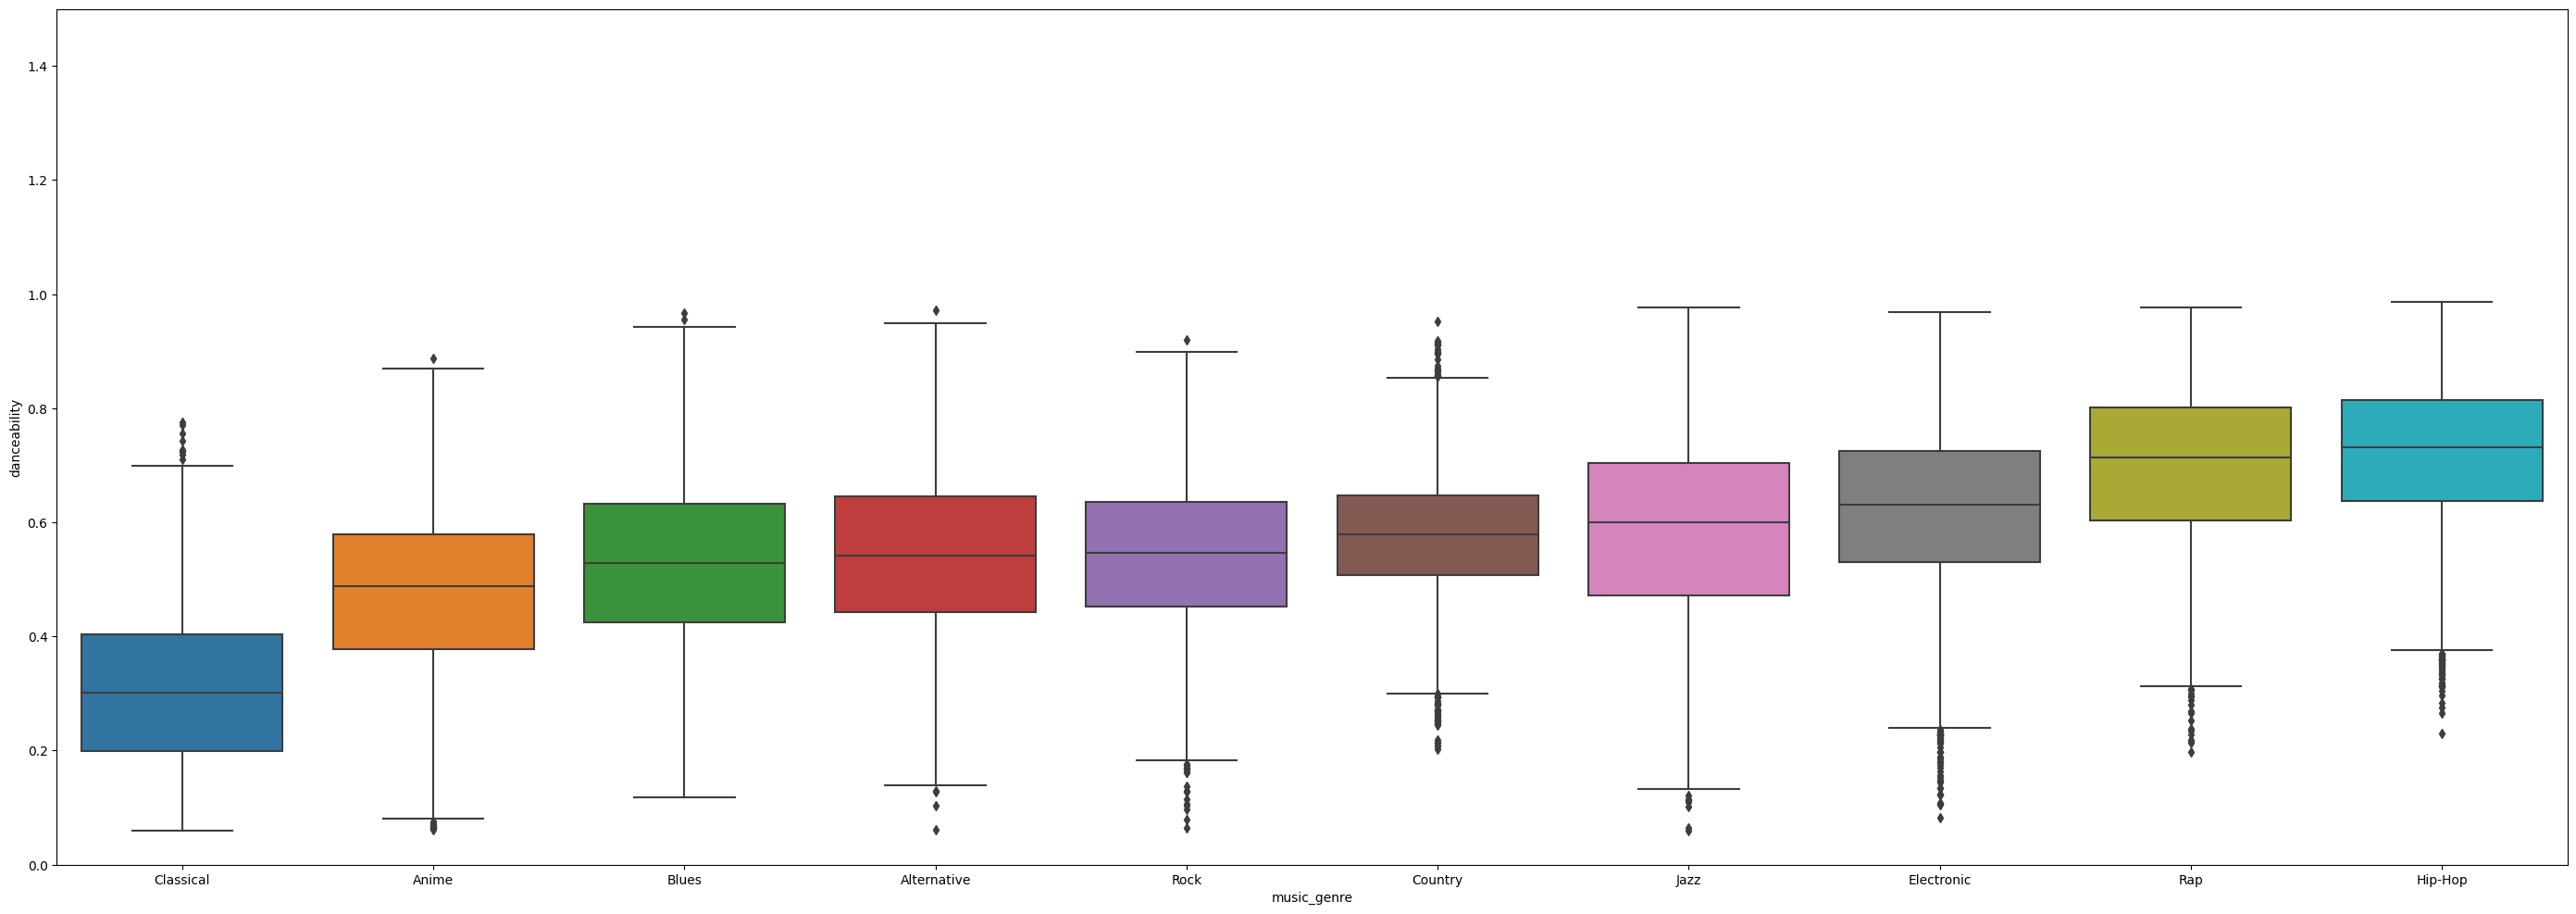

In [19]:
group_means=music.groupby(['music_genre'])['danceability'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='danceability', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and duration_ms

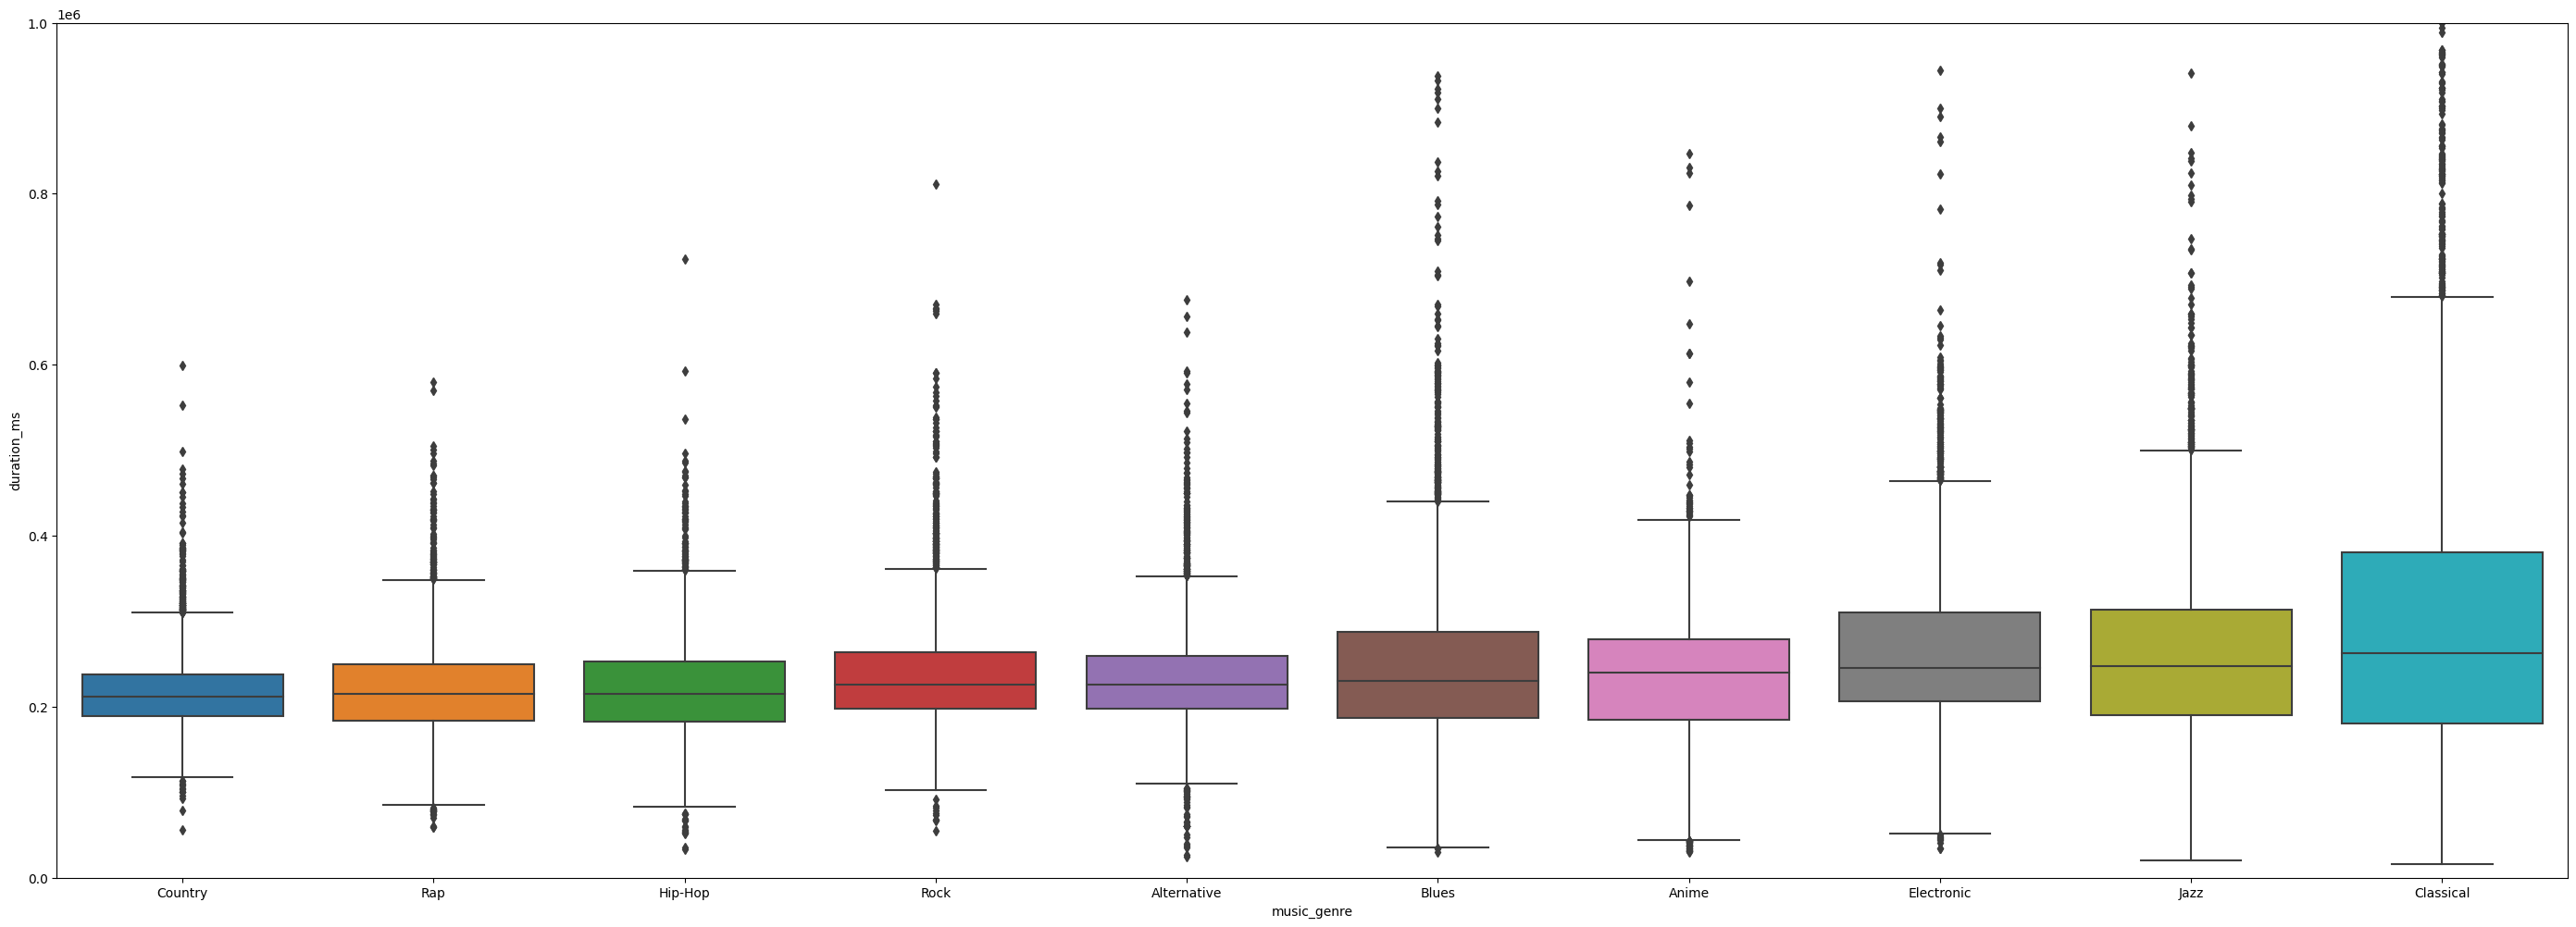

In [20]:
group_means=music.groupby(['music_genre'])['duration_ms'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1000000)
sns.boxplot(x='music_genre', y='duration_ms', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and liveness

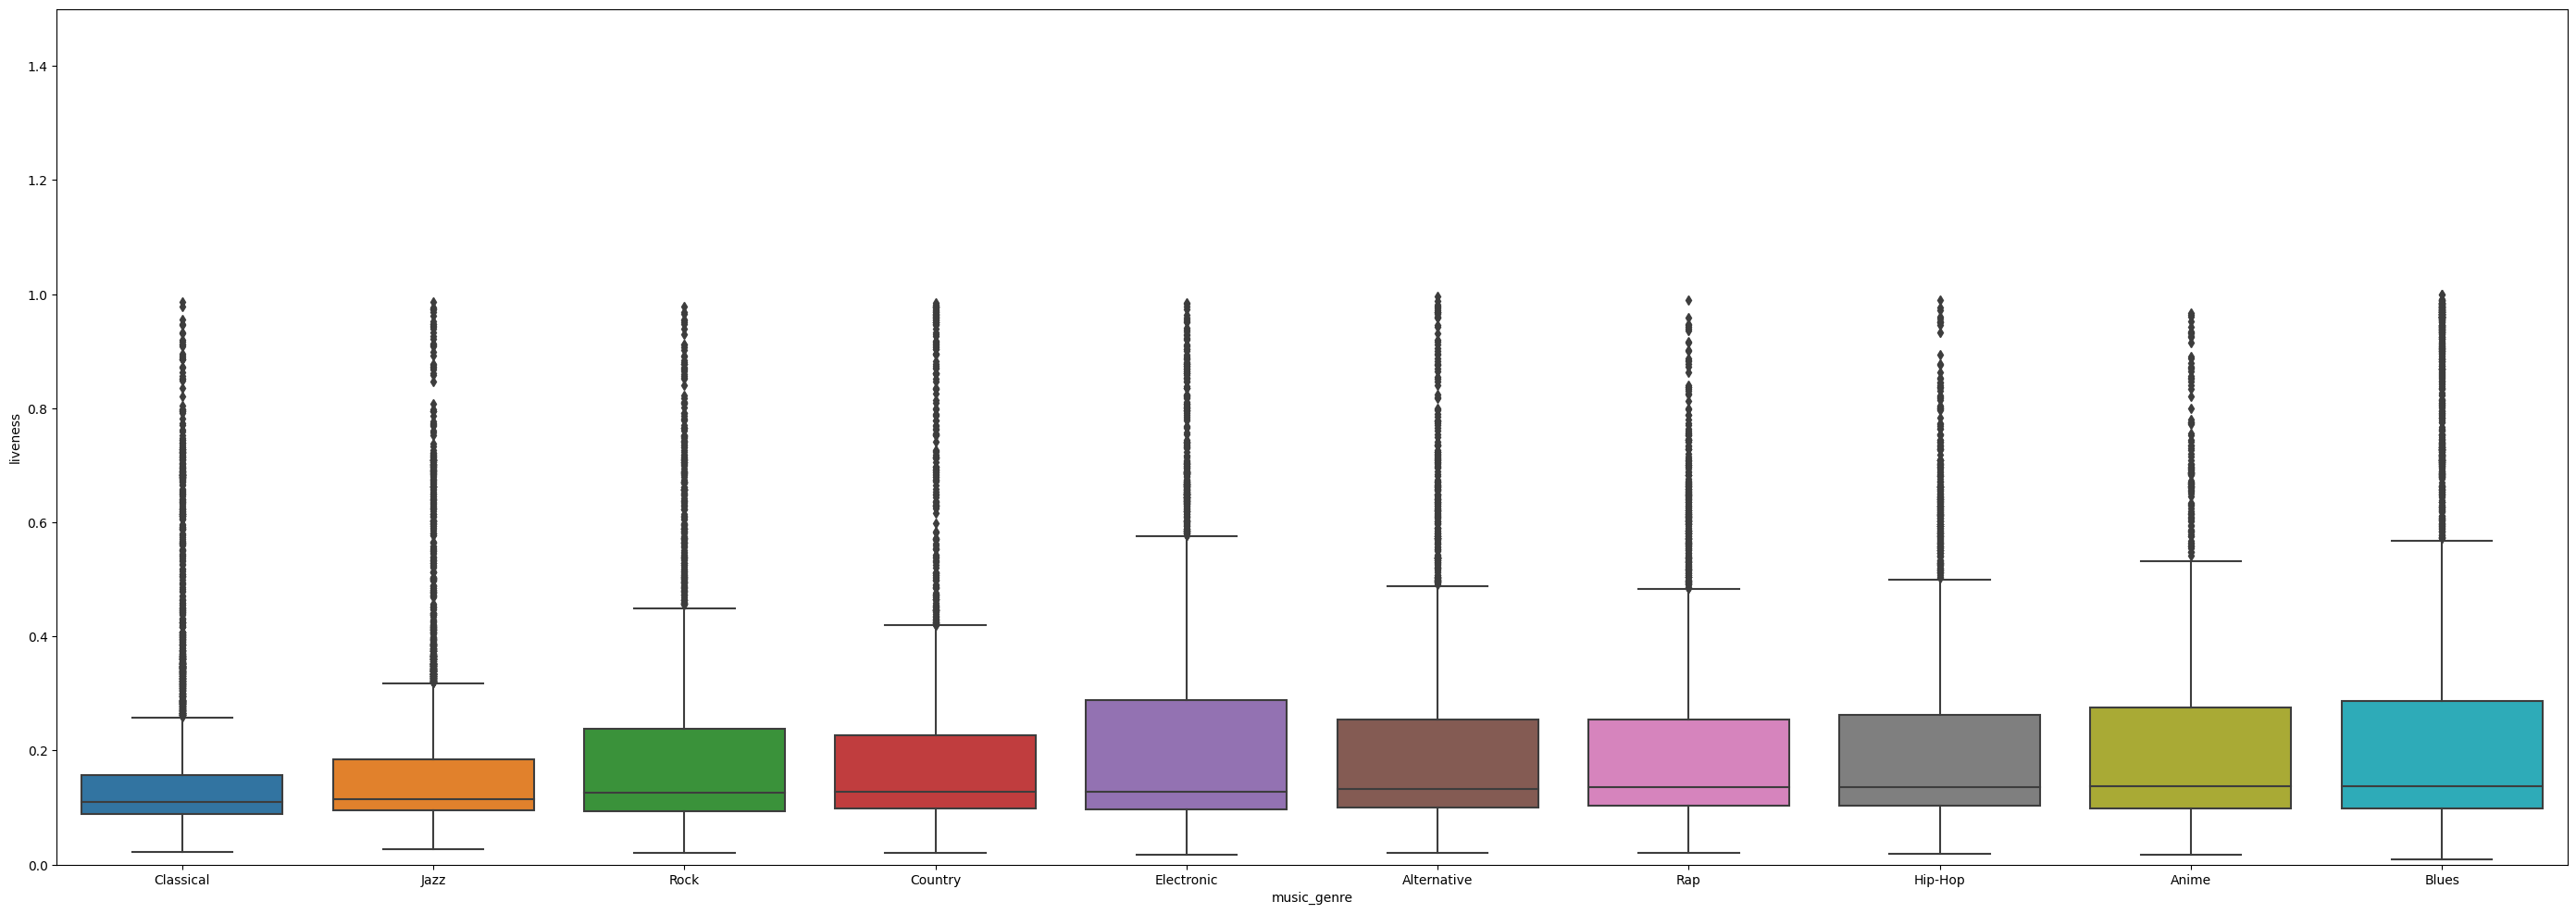

In [21]:
group_means=music.groupby(['music_genre'])['liveness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='liveness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and loudness

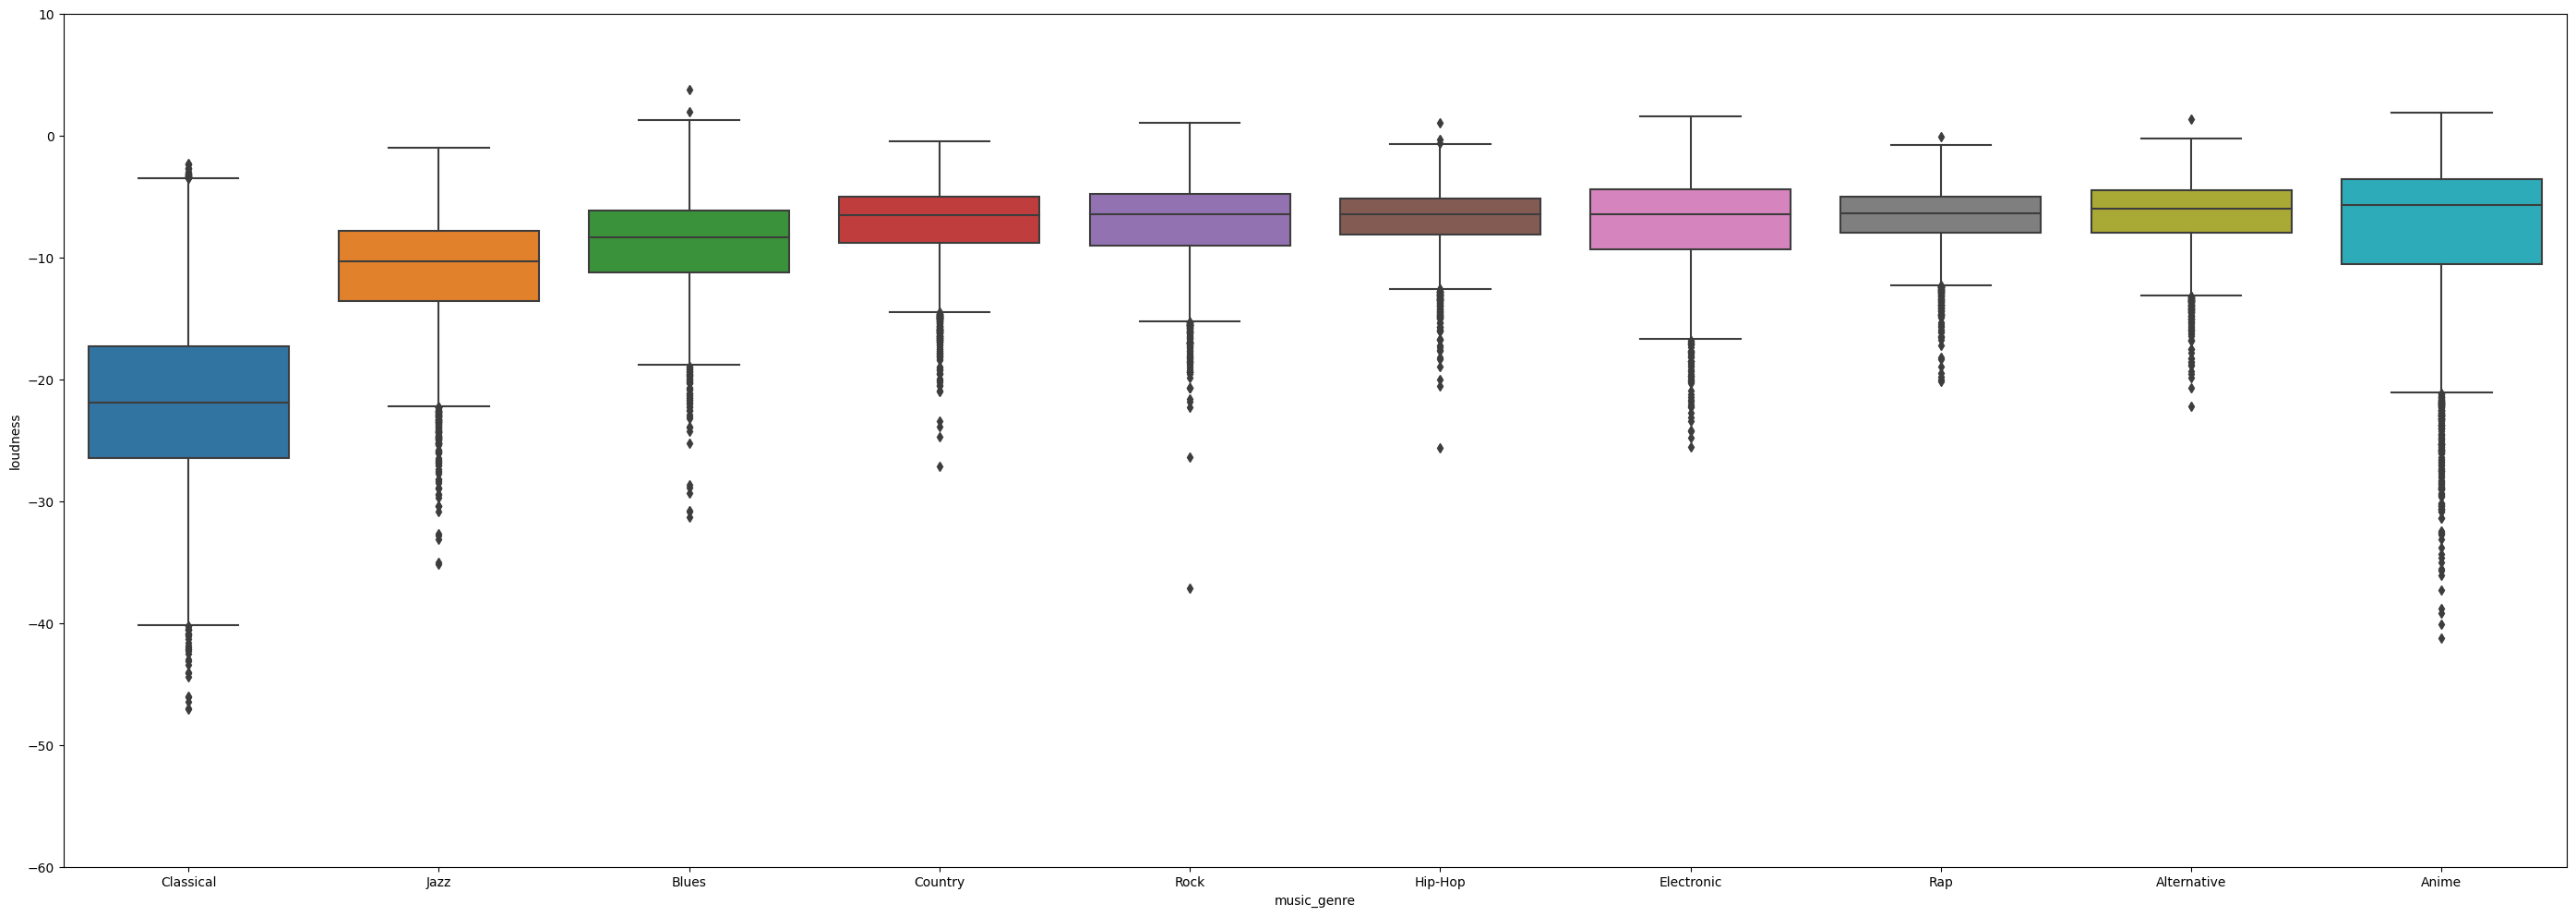

In [22]:
group_means=music.groupby(['music_genre'])['loudness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(-60,10)
sns.boxplot(x='music_genre', y='loudness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and speechiness

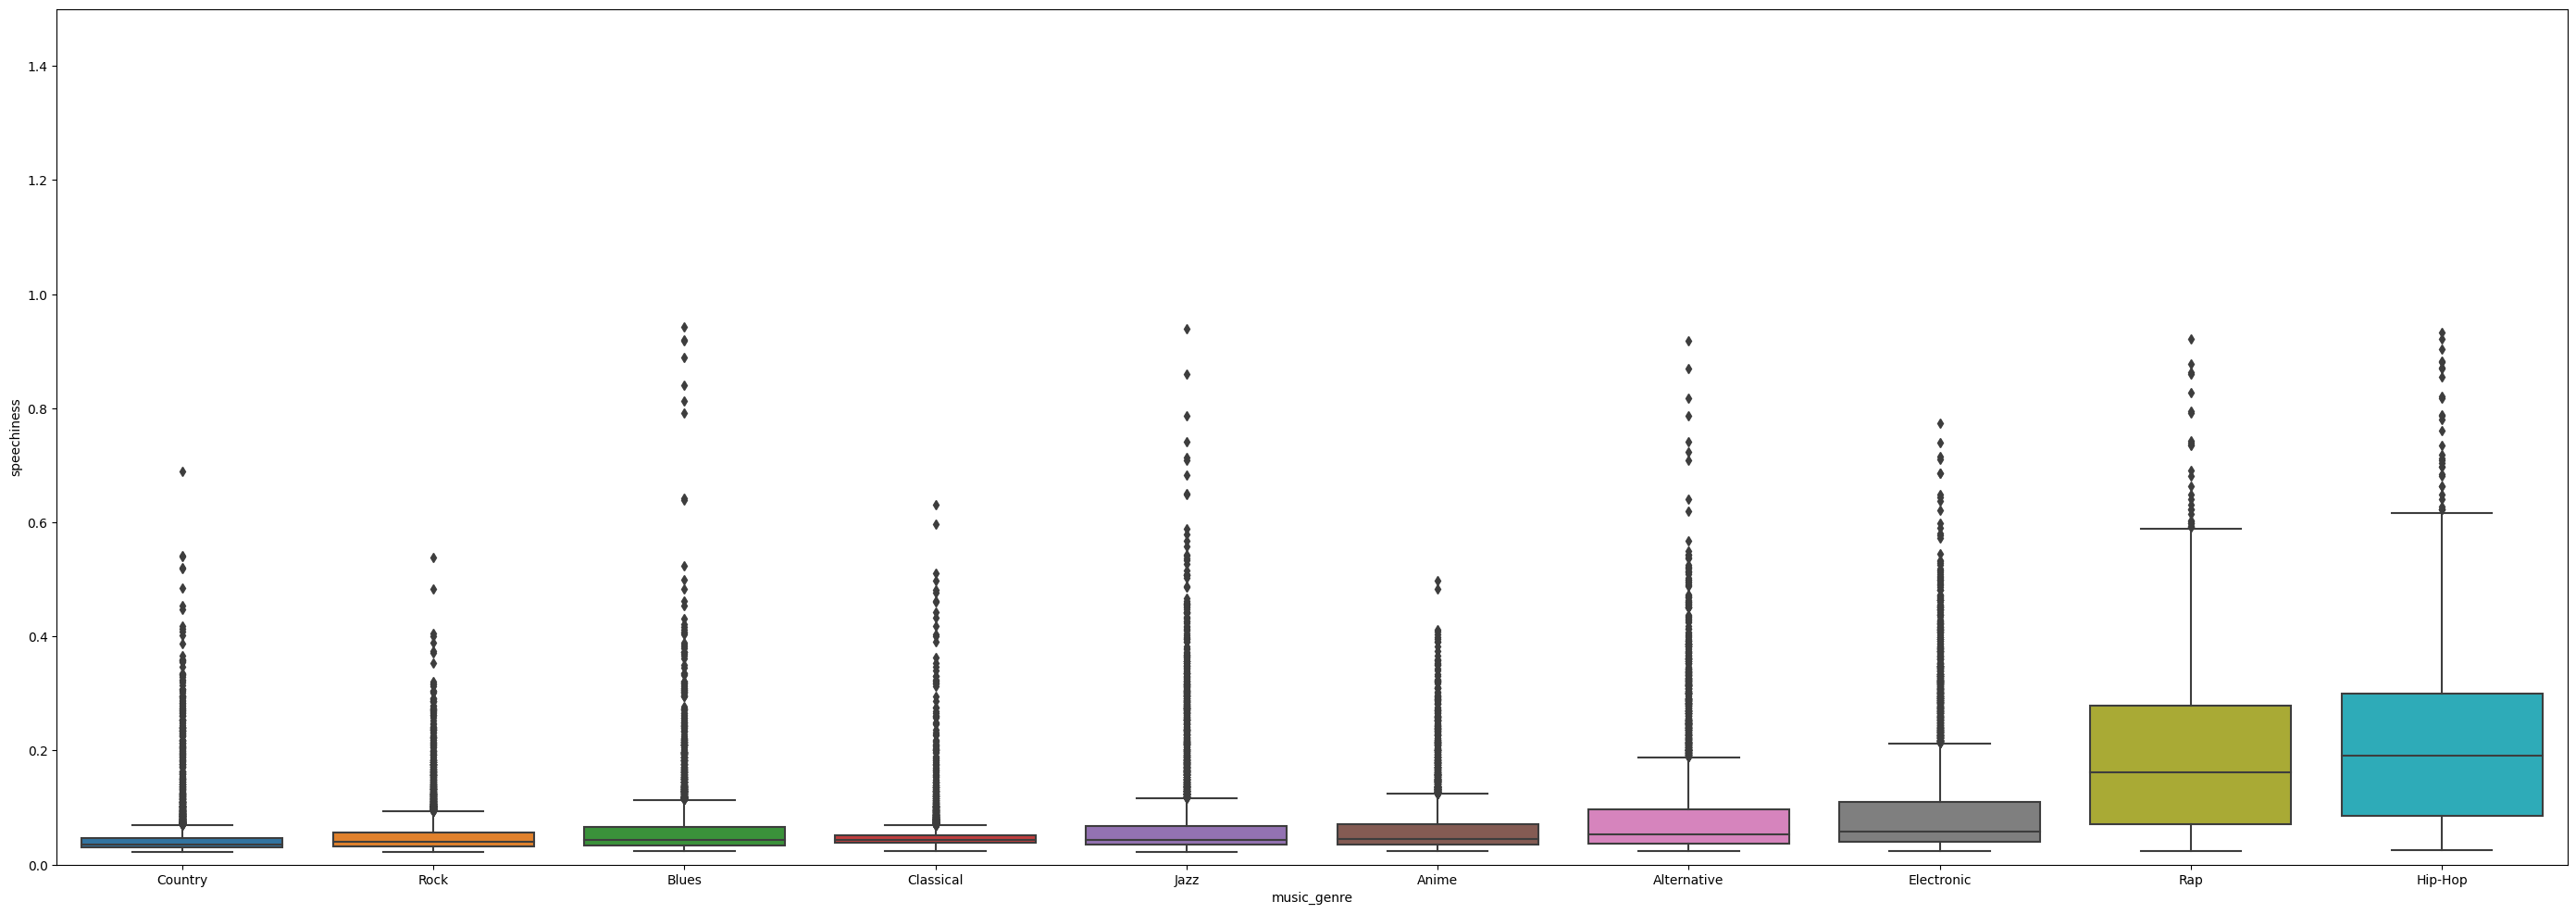

In [23]:
group_means=music.groupby(['music_genre'])['speechiness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='speechiness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and valence

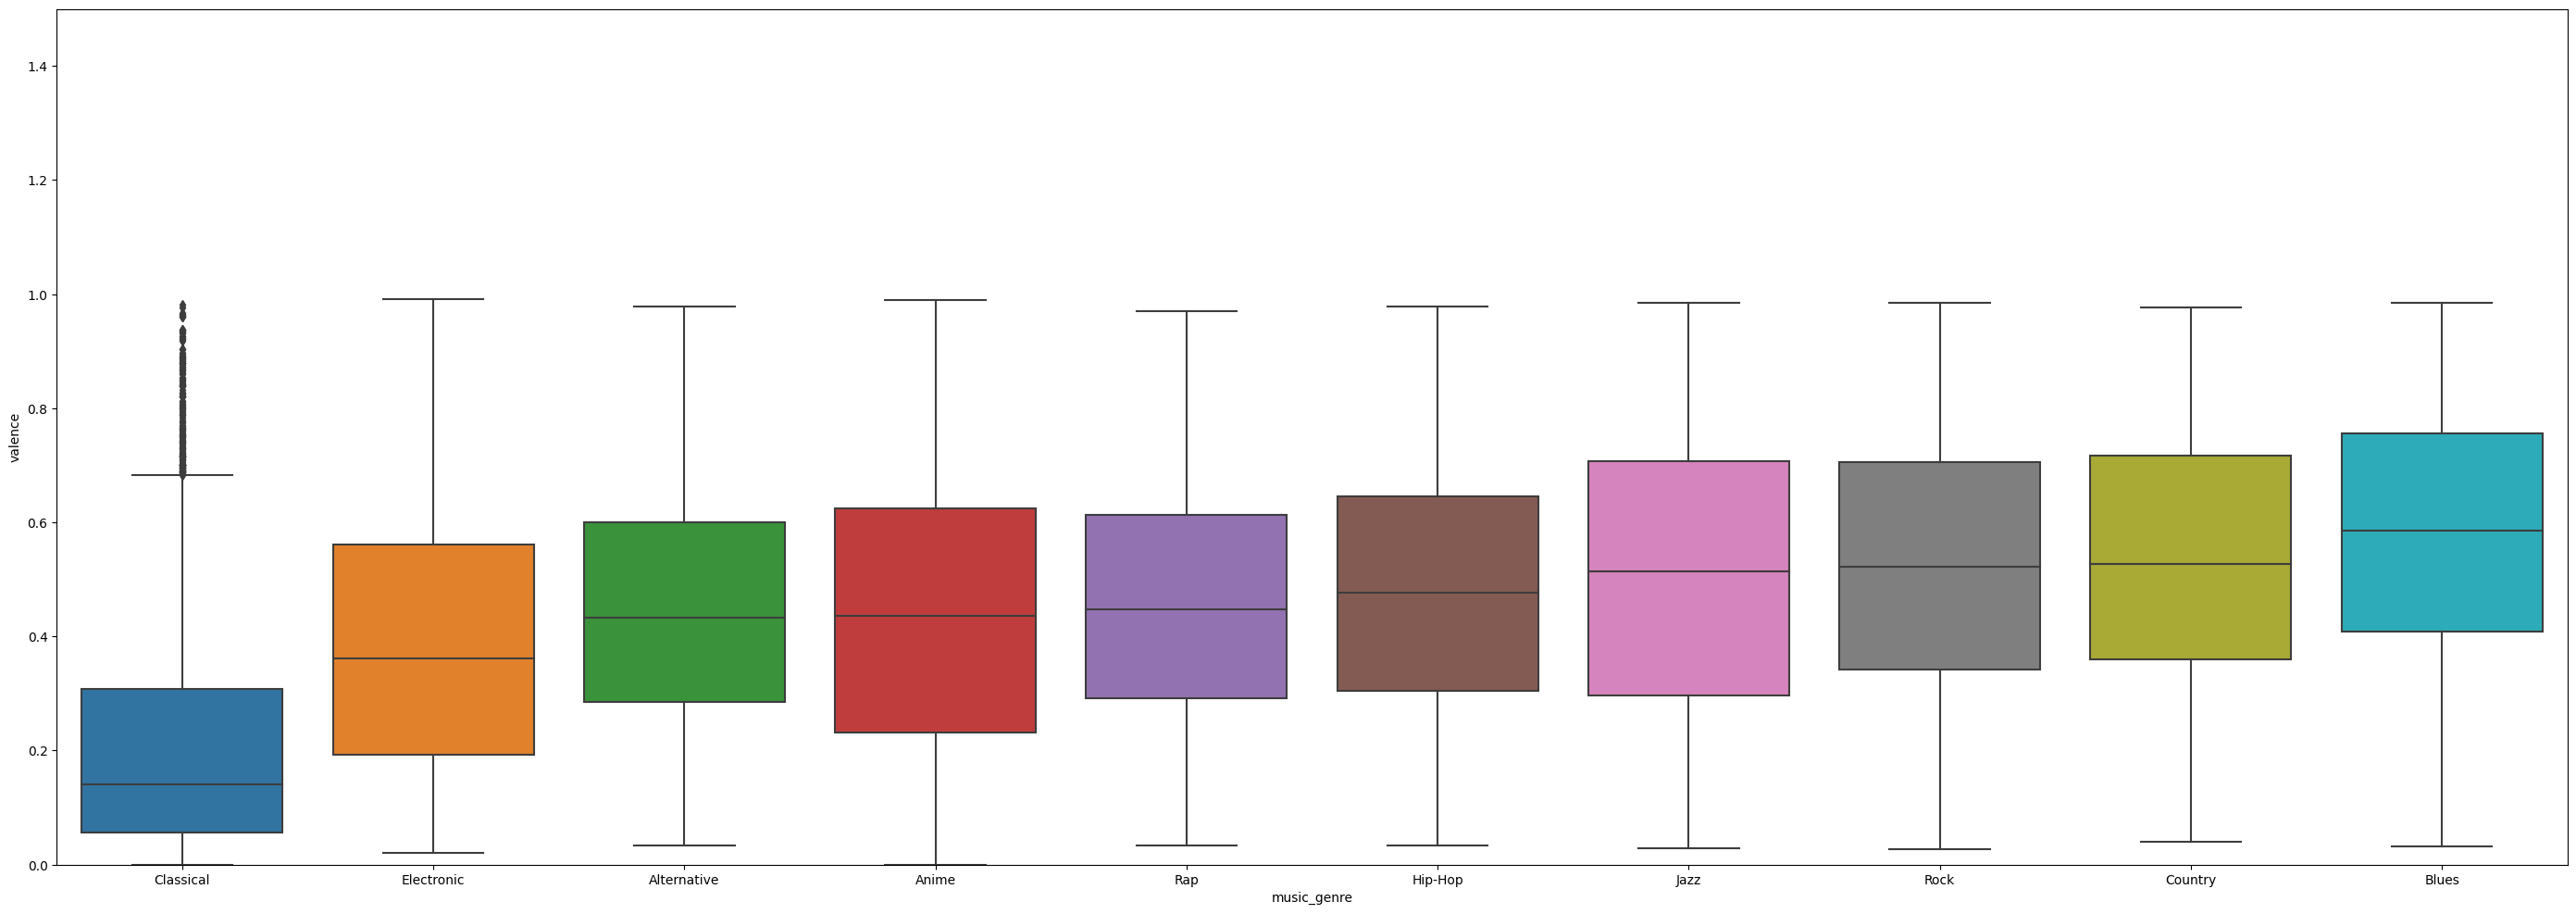

In [24]:
group_means=music.groupby(['music_genre'])['valence'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='valence', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and tempo

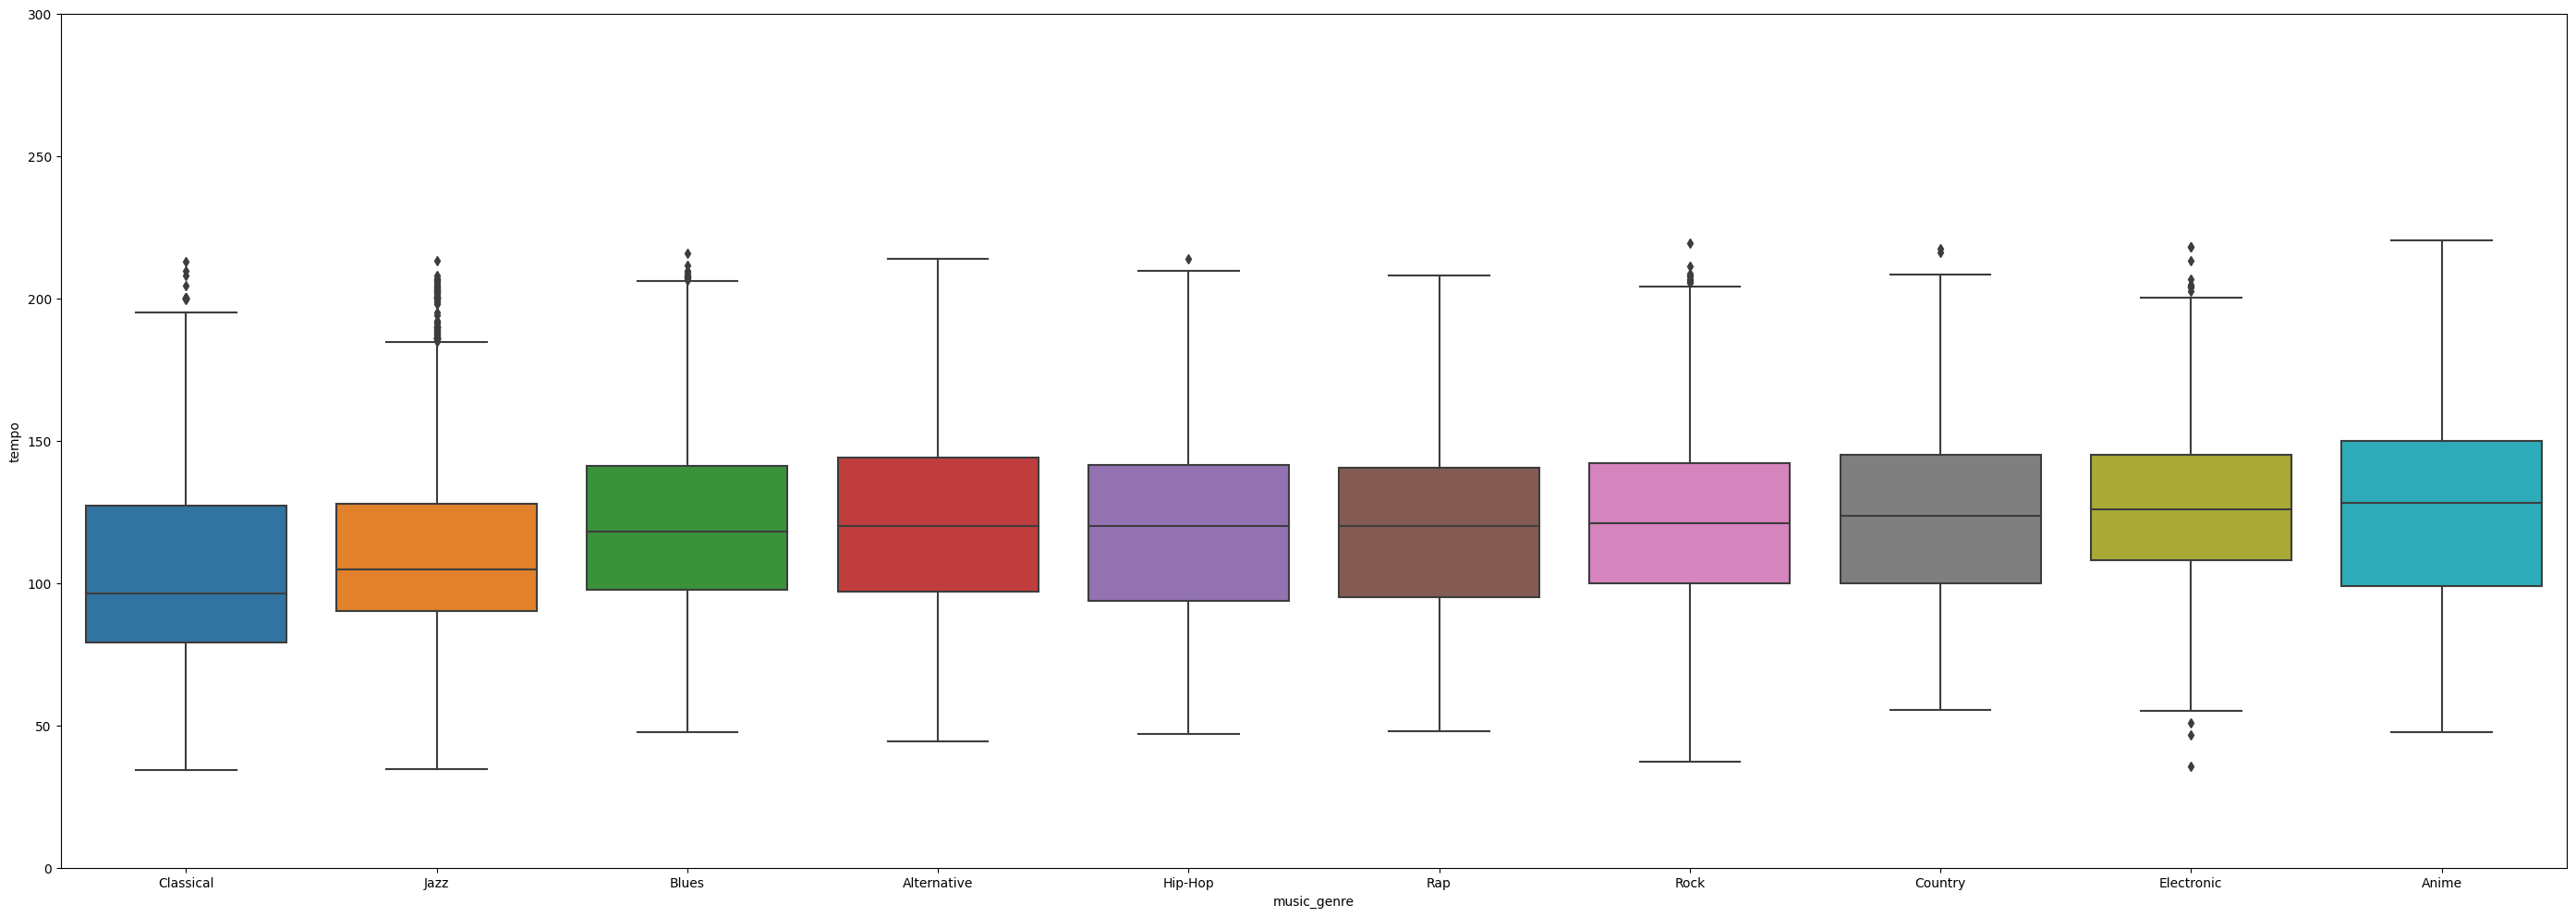

In [25]:
group_means=music.groupby(['music_genre'])['tempo'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,300)
sns.boxplot(x='music_genre', y='tempo', order=group_means.index,data=music)
plt.show()

Of all the numeric variables, the line connecting the medians of the boxplots in popularity vs genre was the closest to linear. This means that different genres enjoy different levels of popularity, with Hip-Hop and R&B being the most popular genres and Classical the Least. Even though the correlation between the remaining variables was not that high. There was still a slight association between each characteristic and the corresponding genre, for instance, the variable "Loudness." Out of all the variables, loudness has the weakest correlation. The line linking the boxplot medians resembles a horizontal line and boxplots are overlapping each other. However, the spread of each boxplot between the first quartile and third quartile still varies slightly. This tiny discrepancy might aid in determining the genre. 

In this project, we have decided to use all numeric variables as the predictors for some reasons. Firstly, we have many genre classes, it is really hard to predict the type of genre based on a few numeric variables. Based on the graph for each numeric variable, most of the genre classes have about the same median and spread between first quartile and third quartile. It will be very hard to do machine learning if there’s only a few predictors. Only with all numeric variables as predictors, we can distinguish the difference.

## Chi - Square Test


Now, we will calculate the correlation between the categorical variables and the genre. This will help us understand the relation between the variables, following which we will have a clearer idea of which variables to choose as our predictors.

The correlation will be calculated using the Chi-Square Test, which finds the probability of a null hypothesis (H0). It starts out with the hypothesis H0 : that the two categorical variables are not related to each other. It then generates the probability, called the p-value, that the hypothesis is true, i.e. they are not related to each other.

If the returned p-value is above 0.5, usually we can assume that the two variables are not related. If the p-value falls below 0.5, they have a fairly strong correlation.

Below is the calculation of p-value for acousticness and genre.

In [26]:
music.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

As we can see here, the categorical variables apart from genre are 'key' and 'mode'. We will now calculate the p-values of these variables with the categorical variable 'genre'.

In [27]:
# importing required functions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

Below is the p-value calculation for genre and key.

In [28]:
# contingency table
table = pd.crosstab(music['music_genre'],music['key'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     2022.8
p-value:            0
degrees of freedom: 99


Below is the p-value calculation for genre and mode of the song.

In [29]:
# contingency table
table = pd.crosstab(music['music_genre'],music['mode'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     1898.1
p-value:            0
degrees of freedom: 9


As we can see from the above calculations, the p-values for all of these variables is 0.0, which could be read to imply that the genre of the song is dependent on all these variables. However, this could also be because the frequencies or counts vary by large amounts across the columns. We will consider these variables in our prediction model because they clearly have a correlation with the genre of the song.

In [30]:
music.to_csv('cleaned_music.csv')

Since we just removed column from dataframe. We need to update the old csv file.